# Pyber Ride Sharing

### Analysis
* Pyber is relatively successful in the urban area with higher number of rides.
* Urban region has most number of drivers and are expensive compared to the other two.
* Most of the rides are between 20 to 30.

In [367]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch

In [368]:
# Load in csv
city_df = pd.read_csv("Resources/city_data.csv")
ride_df = pd.read_csv("Resources/ride_data.csv")

In [369]:
merge_data = pd.merge(ride_df, city_df, on="city")
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


## Bubble Plot of Ride Sharing Data

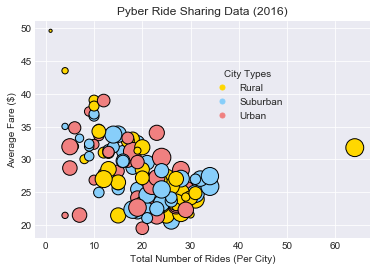

In [370]:
group_city = merge_data.groupby(['city'])
average_fare = (group_city.mean()['fare'])
rides_total = (group_city.count()['ride_id'])
drivers_total = group_city.driver_count.value_counts()

city_type = sorted(city_df['type'].unique())
colors = ["Gold", "LightSkyBlue", "LightCoral"]
sns.set_style("darkgrid")

plt.scatter(rides_total, average_fare,  s=drivers_total*10,c=colors, alpha=1, linewidths=1, edgecolor='black')


patches = [ plt.plot([],[], marker="o", ms=5, ls="",lw=1, color=colors[i], 
            label="{:s}".format(city_type[i]) )[0]  for i in range(len(city_type)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), edgecolor='black',title='City Types')


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
plt.savefig("BubblePlot.png")
plt.show()


## Total Fares by City Type

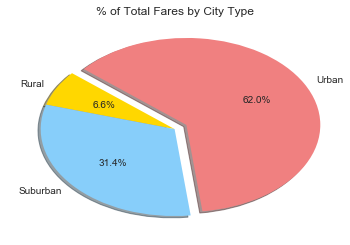

In [371]:
# Labels for the sections of our pie chart
labels = list(merge_data.drop_duplicates().type.unique())
labels = sorted(labels)

total_fares_type = merge_data.groupby(['type']).sum()['fare']
total_fares = merge_data["fare"].sum()

# The values of each section of the pie chart (% of Total Rides by City Type)
sizes = list(total_fares_type/total_fares*100)

# The colors of each section of the pie chart
colors = ["Gold", "LightSkyBlue", "LightCoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Pie chart from the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Title
plt.title("% of Total Fares by City Type")

plt.savefig("Fares.png")
plt.show()


## Total Rides by City Type

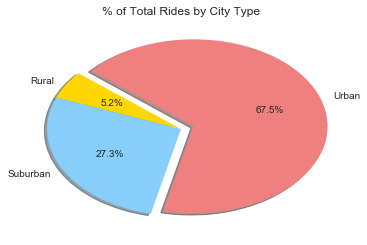

In [372]:
total_rides_type = merge_data.groupby(['type']).count()['ride_id']
total_rides = merge_data["ride_id"].count()

# The values of each section of the pie chart (% of Total Rides by City Type)
sizes = list(total_rides_type/total_rides*100)

# The colors of each section of the pie chart
colors = ["Gold", "LightSkyBlue", "LightCoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Pie chart from the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Title
plt.title("% of Total Rides by City Type")

plt.savefig("Rides.png")
plt.show()


## Total Drivers by City Type

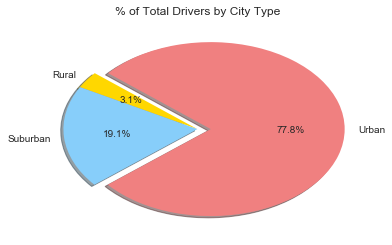

In [373]:
total_drivers_type = city_df.groupby(['type']).sum()["driver_count"]
total_drivers = city_df["driver_count"].sum()

# The values of each section of the pie chart (% of Total Drivers by City Type)
sizes = list(total_drivers_type/total_drivers*100)

# The colors of each section of the pie chart
colors = ["Gold", "LightSkyBlue", "LightCoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Pie chart from the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Title
plt.title("% of Total Drivers by City Type")

plt.savefig("Drivers.png")
plt.show()
